In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
from numpy import array
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
#tf.random.set_seed(7)
#tf.random.set_seed(77)

In [2]:
nc_f    = './icecon.APPX.Bering_Strait.nc'
#nc_f    = './icecon.APPX.90N.135W.nc'
nc_fid  = Dataset(nc_f, 'r')
time    = nc_fid.variables['record'][:]

In [3]:
#sic    = np.cos(time*np.pi)
sic    = np.round(np.square(np.round(np.cos(time*np.pi)*10))/10)*10+np.random.normal(0,1,len(time))*10

In [4]:
nmonth  = len(time)
sic_train       =  sic[0:nmonth-12]
time_train      = time[0:nmonth-12]

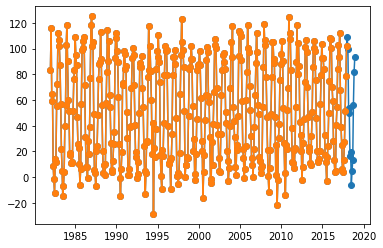

In [5]:
plt.plot(time,sic,'-o')
plt.plot(time_train,sic_train,'-o')

In [6]:
print(sic[nmonth-24:])

[93.07558944553732 112.45232571906494 67.90934880407897 39.34964824702675
 24.894758738984233 6.3945069225013205 3.5694016142017633
 13.436977427490794 27.614894919099783 51.713851119035496
 79.03278381483727 101.91157224511659 108.7253402886464 99.50904020172936
 53.638511426452986 50.05628483586153 16.043055284819836
 19.611627254471117 -5.8661032226008185 4.707067599614625
 12.906990564764868 56.118649290765035 81.97428596377976 93.12888754499386]


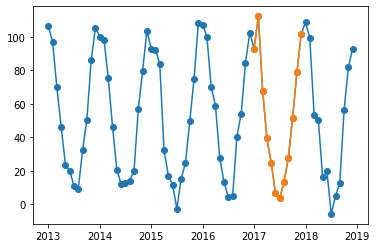

In [7]:
plt.plot(time[nmonth-72:],sic[nmonth-72:],'-o')
plt.plot(time_train[nmonth-24:nmonth-12],sic_train[nmonth-24:nmonth-12],'-o')

In [8]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                        break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return array(X), array(y)

In [9]:
EX1 = [10,20,30,40,50,60,70,80,90]

In [10]:
X, Y = split_sequence(EX1,4)
for i in range(len(X)):
    print(X[i], Y[i])

[10 20 30 40] 50
[20 30 40 50] 60
[30 40 50 60] 70
[40 50 60 70] 80
[50 60 70 80] 90


In [11]:
n_steps = 12
X_SIC, Y_SIC = split_sequence(sic_train,n_steps)
print(X_SIC.shape)

(420, 12)


In [12]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_SIC, Y_SIC, epochs=2000, verbose=0)

In [13]:
sic_new = np.zeros(n_steps)

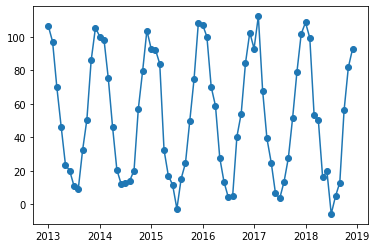

In [14]:
plt.plot(time[nmonth-72:],sic[nmonth-72:],'-o')

sic            at  2018.0 is  108.7253402886464
sic prediction at  2018.0 is  111.62174987792969

sic            at  2018.0833 is  99.50904020172936
sic prediction at  2018.0833 is  97.65391540527344

sic            at  2018.1666 is  53.638511426452986
sic prediction at  2018.1666 is  73.23371124267578

sic            at  2018.25 is  50.05628483586153
sic prediction at  2018.25 is  32.98558044433594

sic            at  2018.3333 is  16.043055284819836
sic prediction at  2018.3333 is  20.41225814819336

sic            at  2018.4166 is  19.611627254471117
sic prediction at  2018.4166 is  7.186263561248779

sic            at  2018.5 is  -5.8661032226008185
sic prediction at  2018.5 is  5.1616973876953125

sic            at  2018.5833 is  4.707067599614625
sic prediction at  2018.5833 is  7.319925308227539

sic            at  2018.6666 is  12.906990564764868
sic prediction at  2018.6666 is  36.743228912353516

sic            at  2018.75 is  56.118649290765035
sic prediction at  2018.75 is 

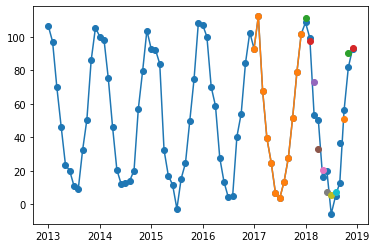

In [15]:
plt.plot(time[nmonth-72:],sic[nmonth-72:],'-o')
plt.plot(time_train[nmonth-24:nmonth-12],sic_train[nmonth-24:nmonth-12],'-o')
for i in range(n_steps):
        x_input = sic[nmonth-24+i:nmonth-12+i]
        #print(time[nmonth-24+i:nmonth-12+i])
        x_input = x_input.reshape((1, n_steps))
        
        #
        #print('input: ', x_input)
        #input('press return to continue')
        sic_new[i] = model.predict(x_input, verbose=0)
        print('sic            at ', time[nmonth-12+i],'is ', sic[nmonth-12+i])
        print('sic prediction at ', time[nmonth-12+i],'is ', sic_new[i])
        print('')
        plt.plot(time[nmonth-12+i],sic_new[i],'-o')
        #input('press return to continue')